In [65]:
from google.colab import files
files.upload()

Saving failed_startup_list.csv to failed_startup_list (1).csv


{'failed_startup_list.csv': b'company_name,company_desc,Category,Country,Started,Outcome,Cause,Closed,Number of Founders,Name of Founders,Number of Employees,Number of Funding Rounds,Total Funding Amount,Number of Investors\r\nYik Yak,Anonymous location-based social network,Social Media,United States,2013,Shut Down,Legal Challenges,2017,3,"Brooks Buffington, Tyler Droll, Will Jamieson",10-50,3,$73.5M,11\r\nVine,Platform to share short looping video clips,Social Media,United States,2012,Shut Down,Multiple Reasons,2017,3,"Colin Kroll, Dom Hofmann, Rus Yusupov",50-100,1,No Data,2\r\nPixate,Platform for mobile interaction design,Design,United States,2012,Shut Down,Acquisition Flu,2016,2,"Kevin Lindsey, Paul Colton",10-50,1,$3.8M,1\r\nQuibi,Short-form streaming platform,Entertainment,United States,2018,Shut Down,Multiple Reasons,2020,1,Jeffrey Katzenberg,250-500,2,$1.8B,14\r\nScaleFactor,Finance and accounting software for SMEs,Finances,United States,2014,Shut Down,Poor Product,2020,1,Kurt 

In [66]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import string
import os

%matplotlib inline

In [67]:
df = pd.read_csv('failed_startup_list.csv')
df.head()

,company_name,company_desc,Category,Country,Started,Outcome,Cause,Closed,Number of Founders,Name of Founders,Number of Employees,Number of Funding Rounds,Total Funding Amount,Number of Investors
0,Yik Yak,Anonymous location-based social network,Social Media,United States,2013,Shut Down,Legal Challenges,2017,3,"Brooks Buffington, Tyler Droll, Will Jamieson",10-50,3,$73.5M,11
1,Vine,Platform to share short looping video clips,Social Media,United States,2012,Shut Down,Multiple Reasons,2017,3,"Colin Kroll, Dom Hofmann, Rus Yusupov",50-100,1,No Data,2
2,Pixate,Platform for mobile interaction design,Design,United States,2012,Shut Down,Acquisition Flu,2016,2,"Kevin Lindsey, Paul Colton",10-50,1,$3.8M,1
3,Quibi,Short-form streaming platform,Entertainment,United States,2018,Shut Down,Multiple Reasons,2020,1,Jeffrey Katzenberg,250-500,2,$1.8B,14
4,ScaleFactor,Finance and accounting software for SMEs,Finances,United States,2014,Shut Down,Poor Product,2020,1,Kurt Rathmann,100-250,7,$103M,17


In [68]:
#the header names are inconsistent -- some small some caps -- to make things easier rename then
df.rename(columns={'company_name': 'Company Name', 'company_desc': 'Company Description'}, inplace=True)
df.head(1) #much better now

,Company Name,Company Description,Category,Country,Started,Outcome,Cause,Closed,Number of Founders,Name of Founders,Number of Employees,Number of Funding Rounds,Total Funding Amount,Number of Investors
0,Yik Yak,Anonymous location-based social network,Social Media,United States,2013,Shut Down,Legal Challenges,2017,3,"Brooks Buffington, Tyler Droll, Will Jamieson",10-50,3,$73.5M,11


In [69]:
print("we have {} rows and {} columns".format(df.shape[0], df.shape[1]))

we have 90 rows and 14 columns


In [70]:
df.info() #we have no null values --

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company Name              90 non-null     object
 1   Company Description       90 non-null     object
 2   Category                  90 non-null     object
 3   Country                   90 non-null     object
 4   Started                   90 non-null     int64 
 5   Outcome                   90 non-null     object
 6   Cause                     90 non-null     object
 7   Closed                    90 non-null     object
 8   Number of Founders        90 non-null     int64 
 9   Name of Founders          90 non-null     object
 10  Number of Employees       90 non-null     object
 11  Number of Funding Rounds  90 non-null     int64 
 12  Total Funding Amount      90 non-null     object
 13  Number of Investors       90 non-null     object
dtypes: int64(3), object(11)
memo

In [71]:
df = df.drop('Country', axis = 1) #drop this since we already know this project is about us-data

In [72]:
df.Started = df.Started.astype('object') #it is pointless for it to be in int64 format

In [73]:
cat_columns = ['Company Name','Category','Started','Outcome','Cause','Closed']
for column in cat_columns:
  print("the unique values in {} are {}".format(column,df[column].unique()))
  print('--------------------------------------------------------------')

the unique values in Company Name are ['Yik Yak' 'Vine' 'Pixate' 'Quibi' 'ScaleFactor' 'Desti' 'HiGear'
 'Zirtual' 'Secret' 'Rafter' 'Netscape' 'Zulily' 'EventVue' 'Totsy'
 'Skully' 'Wantful' 'Gowalla' 'PostRocket' 'Wesabe' 'Lookery'
 'Argyle Social' 'ArsDigita' 'PoliMobile' 'Tilt' 'Delicious' 'Move Loot'
 'QBotix' 'Fuhu' 'Formspring' 'FoundationDB' 'Tutorspree' 'Grooveshark'
 'Transpose' 'RewardMe' 'Maple' 'TeeBeeDee' 'BitPass' 'Flowtab'
 'RethinkDB' 'Leap Transit' 'Teforia' 'Rdio' 'OpTier' 'Fab' '37Coins'
 'Parse' 'Springpad' 'MySpace' 'Shuddle' 'Circa' 'Poliana' 'Design Inc.'
 'Appiterate' 'Kiko' 'Monitor110' 'SpoonRocket' 'Juicero' 'Salorix'
 'Dopplr' 'Kitchit' 'Kno' 'Beepi' 'Mailbox' 'DotCloud' 'LayerVault'
 'Dinner Lab' 'Digg' 'Turntable.fm' 'Sidecar' 'Flud' 'Sprig' 'Sip'
 'MatterFab' 'CircleBack Lending' 'Aria Insights' 'ChaCha' 'Call9' 'Vreal'
 'Utrip' 'Shyp' 'Theranos' 'Laurel & Wolf' 'Stratolaunch' 'Navdy' 'Anki'
 'Munchery']
--------------------------------------------------

In [74]:
df = df.drop('Name of Founders', axis = 1) #this shouldnt matter much to us

In [75]:
df.head(1)

,Company Name,Company Description,Category,Started,Outcome,Cause,Closed,Number of Founders,Number of Employees,Number of Funding Rounds,Total Funding Amount,Number of Investors
0,Yik Yak,Anonymous location-based social network,Social Media,2013,Shut Down,Legal Challenges,2017,3,10-50,3,$73.5M,11


In [76]:
for x in df['Number of Employees']: #couple of outliers
  if '-' not in x:
    print(x)

+10,000
+10,000


In [77]:
df[df['Number of Employees'] == '+10,000']

,Company Name,Company Description,Category,Started,Outcome,Cause,Closed,Number of Founders,Number of Employees,Number of Funding Rounds,Total Funding Amount,Number of Investors
15,Wantful,Online gift-giving service,e-Commerce,2011,Shut Down,Competition,2013,1,"+10,000",1,$5.5M,8
62,Kno,Education software startup,Education,2009,Acquired,Competition,2013,2,"+10,000",7,$94.9M,10


In [78]:
df['Number of Employees'] = df['Number of Employees'].replace('+10,000', '10,000-15,000')

In [79]:
df.iloc[15] #transformation applied

Company Name                                   Wantful
Company Description         Online gift-giving service
Category                                    e-Commerce
Started                                           2011
Outcome                                      Shut Down
Cause                                      Competition
Closed                                            2013
Number of Founders                                   1
Number of Employees                      10,000-15,000
Number of Funding Rounds                             1
Total Funding Amount                             $5.5M
Number of Investors                                  8
Name: 15, dtype: object

In [80]:
df[['Min Employees','Max Employees']] = [x.split('-') for x in df['Number of Employees']]

In [81]:
df['Min Employees'] = df['Min Employees'].replace('5,000','5000')
df['Min Employees'] = df['Min Employees'].replace('1,000','1000')
df['Min Employees'] = df['Min Employees'].replace('10,000','10000')

df['Max Employees'] = df['Max Employees'].replace('10,000','10000')
df['Max Employees'] = df['Max Employees'].replace('5,000','5000')
df['Max Employees'] = df['Max Employees'].replace('15,000','15000')
df['Max Employees'] = df['Max Employees'].replace('1,000','1000')

In [82]:
df['Min Employees'] = df['Min Employees'].astype('int')
df['Max Employees'] = df['Max Employees'].astype('int')

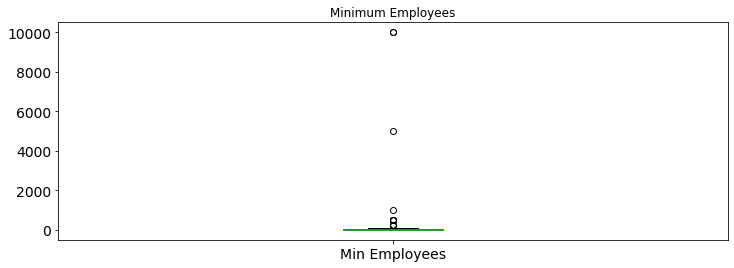

In [83]:
_ = df['Min Employees'].plot(kind = 'box', figsize=(12, 4), title = 'Minimum Employees', fontsize=14) # we have outliers

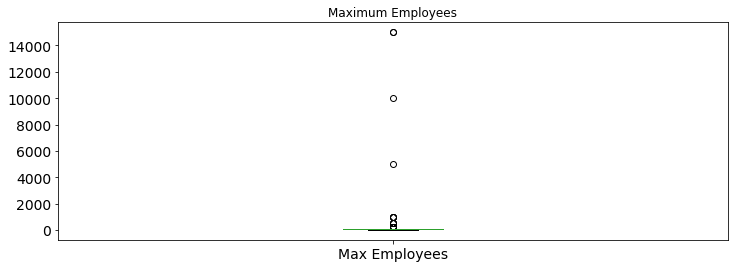

In [84]:
_ = df['Max Employees'].plot(kind = 'box', figsize=(12, 4), title = 'Maximum Employees', fontsize=14) #we have outliers

In [85]:
df['Average Employees'] = (df['Min Employees'] + df['Max Employees']) // 2

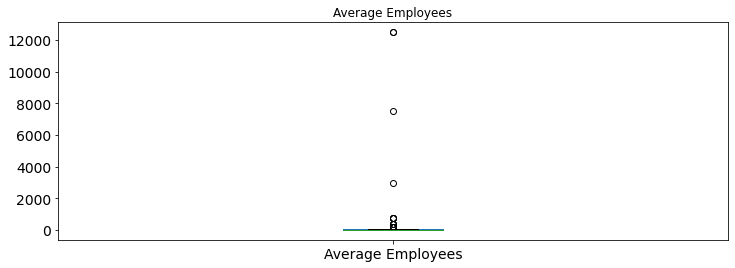

In [86]:
_ = df['Average Employees'].plot(kind = 'box', figsize=(12, 4), title = 'Average Employees', fontsize=14) #we have outliers

In [87]:
df.sample(3)

,Company Name,Company Description,Category,Started,Outcome,Cause,Closed,Number of Founders,Number of Employees,Number of Funding Rounds,Total Funding Amount,Number of Investors,Min Employees,Max Employees,Average Employees
43,OpTier,Cloud-based enterprise software business,Analytics,2002,Shut Down,Lack of PMF,2014,2,50-100,9,$118.1M,8,50,100,75
36,Yik Yak,Anonymous location-based social network,Social Media,2013,Shut Down,Legal Challenges,2017,3,10-50,3,$73.5M,11,10,50,30
58,Juicero,First home cold-pressed juicing system,Food & Beverage,2013,Bankruptcy,Bad Business Model,2017,1,100-250,4,$118.5M,16,100,250,175


In [88]:
df = df.drop('Number of Employees',axis = 1)

In [89]:
df['Number of Investors'].unique()

array(['11', '2', '1', '14', '17', '3', '4', '10', '21', '7', '9', '13',
       '8', '22', '0', '26', '18', 'No Data', '6', '16', '5', '34', '39',
       '20', '31', '15'], dtype=object)

In [90]:
df['Number of Investors'] = df['Number of Investors'].replace('No Data', '-999')

In [91]:
df['Number of Investors'] = df['Number of Investors'].astype('int')

In [92]:
df=df.replace('\$','',regex=True)

In [93]:
df['Total Funding Amount'].unique()

array(['73.5M', 'No Data', '3.8M', '1.8B', '103M', '2M', '1.3M', '5.5M',
       '35M', '86M', '194.6M', '455K', '29.5M', '15M', '10.4M', '610K',
       '4.7M', '3.2M', '1.6M', '-', '62.1M', '21.8M', '23.5M', '66.2M',
       '14.3M', '22.7M', '1.8M', '4.6M', '1.5M', '1.1M', '29M', '4.8M',
       '13.3M', '12.2M', '2.5M', '17.1M', '125.7M', '118.1M', '336.3M',
       '525K', '7M', '7.3M', '37.8M', '15K', '2.3M', '500K', '50K',
       '17.3M', '13.5M', '118.5M', '3.5M', '8.1M', '94.9M', '149M', '5M',
       '13.7M', '535K', '9.1M', '49M', '45.5M', '3.1M', '56.7M',
       'Nothing', '13.2M', '12M', '39M', '96M', '34M', '6M', '1.4B',
       '25.5M', '41.8M', '182M', '125.4M'], dtype=object)

In [113]:
df['Unit'] = [x[-1] for x in df['Total Funding Amount']]

In [116]:
df['Unit'].unique()

array(['M', 'a', 'B', 'K', '-', 'g'], dtype=object)

In [117]:
df['Total Funding Amount'] = df['Total Funding Amount'].replace('M','',regex=True)
df['Total Funding Amount'] = df['Total Funding Amount'].replace('K','',regex=True)
df['Total Funding Amount'] = df['Total Funding Amount'].replace('B','',regex=True)
df['Total Funding Amount'] = df['Total Funding Amount'].replace('No Data','1',regex=True)
df['Total Funding Amount'] = df['Total Funding Amount'].replace('-','1',regex=True)
df['Total Funding Amount'] = df['Total Funding Amount'].replace('Nothing','1',regex=True)

In [120]:
df['Unit'] = df['Unit'].replace('M',1000000)
df['Unit'] = df['Unit'].replace('B',1000000000)
df['Unit'] = df['Unit'].replace('K',1000)

df['Unit'] = df['Unit'].replace('a',-999)
df['Unit'] = df['Unit'].replace('-',-999)
df['Unit'] = df['Unit'].replace('g',-999)

In [123]:
df['Total Funding Amount'] = df['Total Funding Amount'].astype('float')
df['Unit'] = df['Unit'].astype('float')

In [125]:
df['Total Funding Amount'] = df['Total Funding Amount'] * df['Unit']

In [127]:
df = df.drop('Unit',axis = 1)

In [132]:
df.head(3)

,Company Name,Company Description,Category,Started,Outcome,Cause,Closed,Number of Founders,Number of Funding Rounds,Total Funding Amount,Number of Investors,Min Employees,Max Employees,Average Employees
0,Yik Yak,Anonymous location-based social network,Social Media,2013,Shut Down,Legal Challenges,2017,3,3,73500000.0,11,10,50,30
1,Vine,Platform to share short looping video clips,Social Media,2012,Shut Down,Multiple Reasons,2017,3,1,-999.0,2,50,100,75
2,Pixate,Platform for mobile interaction design,Design,2012,Shut Down,Acquisition Flu,2016,2,1,3800000.0,1,10,50,30


In [138]:
df['Closed'].unique()

array(['2017', '2016', '2020', '2014', '2011', '2015', '2008', 'Active',
       '2010', '2013', '2009', '2002', '2007', '2019', '2018'],
      dtype=object)

In [139]:
df = df[df.Closed != 'Active']  #if the status is active, the startup never failed, so get rid of it

In [142]:
df['Closed'] = df['Closed'].astype('int')

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 89
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Company Name              84 non-null     object 
 1   Company Description       84 non-null     object 
 2   Category                  84 non-null     object 
 3   Started                   84 non-null     int64  
 4   Outcome                   84 non-null     object 
 5   Cause                     84 non-null     object 
 6   Closed                    84 non-null     int64  
 7   Number of Founders        84 non-null     int64  
 8   Number of Funding Rounds  84 non-null     int64  
 9   Total Funding Amount      84 non-null     float64
 10  Number of Investors       84 non-null     int64  
 11  Min Employees             84 non-null     int64  
 12  Max Employees             84 non-null     int64  
 13  Average Employees         84 non-null     int64  
dtypes: float64(1

In [144]:
df.to_csv('cleaned.csv')